## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report, roc_auc_score
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb

In [2]:
# read in csv dataset
df = pd.read_csv("/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv",index_col='id')

In [3]:
# let's have a peek on what's inside of the dataframe
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,,,,,,,,,,,,,,,,,,,,,
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568630 entries, 0 to 568629
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      568630 non-null  float64
 1   V2      568630 non-null  float64
 2   V3      568630 non-null  float64
 3   V4      568630 non-null  float64
 4   V5      568630 non-null  float64
 5   V6      568630 non-null  float64
 6   V7      568630 non-null  float64
 7   V8      568630 non-null  float64
 8   V9      568630 non-null  float64
 9   V10     568630 non-null  float64
 10  V11     568630 non-null  float64
 11  V12     568630 non-null  float64
 12  V13     568630 non-null  float64
 13  V14     568630 non-null  float64
 14  V15     568630 non-null  float64
 15  V16     568630 non-null  float64
 16  V17     568630 non-null  float64
 17  V18     568630 non-null  float64
 18  V19     568630 non-null  float64
 19  V20     568630 non-null  float64
 20  V21     568630 non-null  float64
 21  V22     568630 

In [5]:
# count the total number of frauds and non-frauds
df["Class"].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

It seems that we have a balance betwen the number of frauds and non-frauds.

## Explore and analysis the data

array([[<Axes: title={'center': 'V1'}>, <Axes: title={'center': 'V2'}>,
        <Axes: title={'center': 'V3'}>, <Axes: title={'center': 'V4'}>],
       [<Axes: title={'center': 'V5'}>, <Axes: title={'center': 'V6'}>,
        <Axes: title={'center': 'V7'}>, <Axes: title={'center': 'V8'}>],
       [<Axes: title={'center': 'V9'}>, <Axes: title={'center': 'V10'}>,
        <Axes: title={'center': 'V11'}>, <Axes: title={'center': 'V12'}>],
       [<Axes: title={'center': 'V13'}>, <Axes: title={'center': 'V14'}>,
        <Axes: title={'center': 'V15'}>, <Axes: title={'center': 'V16'}>],
       [<Axes: title={'center': 'V17'}>, <Axes: title={'center': 'V18'}>,
        <Axes: title={'center': 'V19'}>, <Axes: title={'center': 'V20'}>],
       [<Axes: title={'center': 'V21'}>, <Axes: title={'center': 'V22'}>,
        <Axes: title={'center': 'V23'}>, <Axes: title={'center': 'V24'}>],
       [<Axes: title={'center': 'V25'}>, <Axes: title={'center': 'V26'}>,
        <Axes: title={'center': 'V27'}>, 

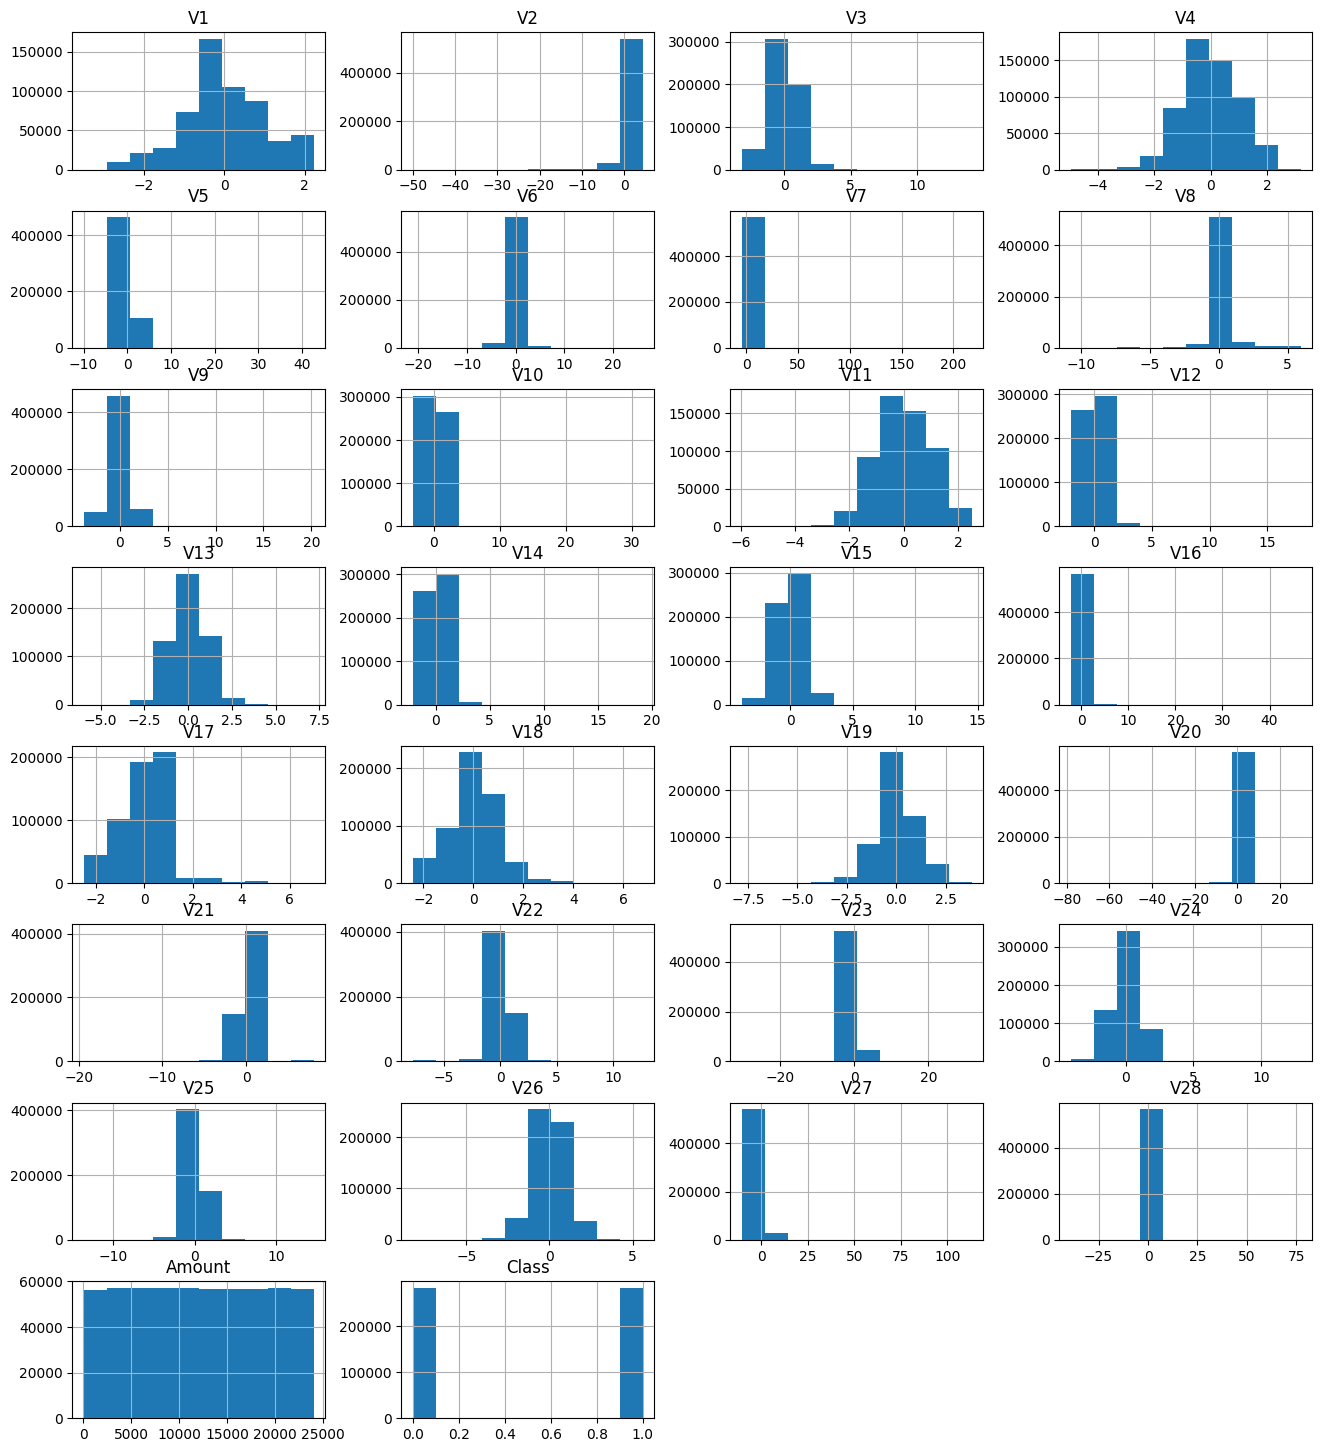

In [6]:
# data distribution with histograms
df.hist(bins=10,figsize=(16,18),layout=(8,4))

Next, let's see if the parameters are correlated or not. If any of the parameter are highly correlated with others, it undermines the statistical significance of that parameter. Multicollinearity exists whenever an independent variable is highly correlated with one or more of the other independent variables in a multiple regression equation.

<Axes: >

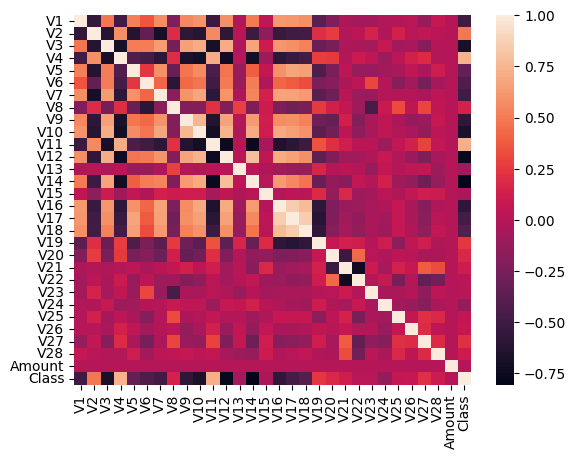

In [7]:
# check the correlation
df_corr = df.corr()
sns.heatmap(df_corr,xticklabels=True, yticklabels=True)

We can clearly see that there are some highly correlated parameters from the heatmap (extremely light or dark colour). Here, I consider a correlation coefficient larger than 0.7 is highly correlated. We can then find out which are the parameter pairs that are highly correlated.

In [8]:
# find highly correlated variables
row_col_name = df_corr.index
for num_row in range(len(row_col_name)):
    for num_col in range(num_row+1,len(row_col_name)):
        row_name = row_col_name[num_row]
        col_name = row_col_name[num_col]
        val = df_corr[row_name][col_name]
        if val>0.7 and (row_name !="id" and row_name!="Class") and (col_name !="id" and col_name!="Class"):
            print(row_name,col_name,val)

V3 V10 0.7076758294754224
V3 V12 0.7054965815551926
V4 V11 0.7086423094474218
V9 V10 0.7484867020106862
V10 V12 0.7367831820400966
V12 V14 0.7838777077741362
V16 V17 0.8480951658049641
V16 V18 0.7679917806757725
V17 V18 0.8513662967516887


There are 9 pairs of highly correlated parameters. 

## Data Preparation

In [9]:
# separate data into data and labels
X = df.drop(["Class"],inplace=False,axis=1)
y = df["Class"]

In [10]:
# split dataset into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [11]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(454904, 29) (113726, 29) (454904,) (113726,)


In [12]:
# scale the training and testing dataset with standard scaler
scaler = StandardScaler()

# fit() is used to compute the mean and standard deviation of the training data
scaler.fit(X_train) 

# transform() is used to transform data using the mean and std computed by .fit()
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Principal Component Analysis
As analysed from the correlation analysis, there are several pairs of highly correlated parameters. We can use Principal Component Analysis(PCA) to reduce the data dimensionality. 

In [13]:
# find the suitable number of principal components that explains the most variance
total_explained_variance_arr = []
for num_pca in range(15,28):
    pca = PCA(n_components = num_pca)
    pca.fit(scaled_X_train)
    explained_variance = pca.explained_variance_ratio_
    total_explained_variance = explained_variance.sum()
    total_explained_variance_arr.append(total_explained_variance)
    print("number of components:%d, total_explained_variance:%.4f" %(num_pca,total_explained_variance))

number of components:15, total_explained_variance:0.8745
number of components:16, total_explained_variance:0.8888
number of components:17, total_explained_variance:0.9023
number of components:18, total_explained_variance:0.9146
number of components:19, total_explained_variance:0.9267
number of components:20, total_explained_variance:0.9366
number of components:21, total_explained_variance:0.9463
number of components:22, total_explained_variance:0.9549
number of components:23, total_explained_variance:0.9630
number of components:24, total_explained_variance:0.9705
number of components:25, total_explained_variance:0.9773
number of components:26, total_explained_variance:0.9838
number of components:27, total_explained_variance:0.9902


Here, we select the number of components corresponds to a total explained variance higher than 0.95, which is 22. 

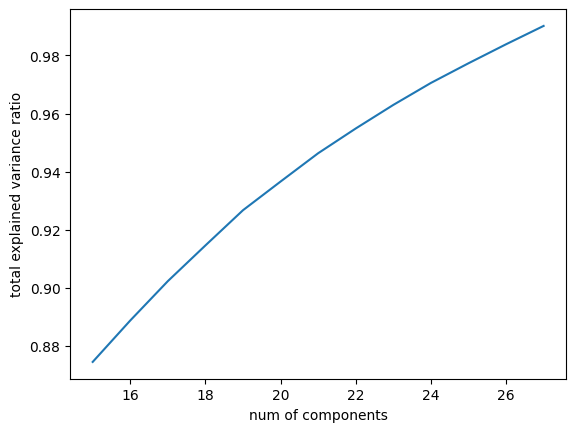

In [14]:
# using plot() to visualize the total variance
plt.plot(range(15,28), total_explained_variance_arr)
plt.xlabel("num of components")
plt.ylabel("total explained variance ratio")
plt.show()

In [15]:
# perform pca dimensionality reduction on the testing and training dataset using 22 pca components
pca = PCA(n_components=22)
pca.fit(scaled_X_train)
pca_X_train = pca.transform(scaled_X_train)
pca_X_test = pca.transform(scaled_X_test)

In [16]:
print('Shape of Training Data : {} '.format(pca_X_train.shape))
print('Shape of Testing Data : {} '.format(pca_X_test.shape))

Shape of Training Data : (454904, 22) 
Shape of Testing Data : (113726, 22) 


## Train classification models

I have selected several classifiers from logistic regression, to gradient boosting and neural network. 

In [17]:
# list of models
models = {'Logistic Regression':LogisticRegression(max_iter=200), 
         'Support Vector Classifier':SVC(max_iter=200),
         'Decision Tree':DecisionTreeClassifier(),
         'Random Forest':RandomForestClassifier(),
         'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1),
         'Neural Network':MLPClassifier(max_iter=200),
         'Stochastic Gradient Descent':SGDClassifier(), 
         'KNN':KNeighborsClassifier(), 
         'Ada Boost': AdaBoostClassifier(),
         'Cat Boost': CatBoostClassifier(), 
         'Light GBM': LGBMClassifier()}

In [18]:
# record time taken and accuracy of each algorithm
model_time_acc = {}

# create training pipeline
for model, algorithm in models.items():
    pipe = Pipeline([('model', algorithm)])
    start_time = datetime.now() 
    pipe.fit(pca_X_train ,y_train)
    end_time = datetime.now() 
    prediction = pipe.predict(pca_X_test)
    print('\n ======= For {} ============ \n'.format(model))
    print('Accuracy Score : {} '.format(accuracy_score(prediction,y_test)))
    print('Confusion Matrix \n\n  ',confusion_matrix(prediction,y_test))
    print('\n Classification Report \n ')
    print(classification_report(prediction,y_test))
    time_difference = (end_time - start_time).total_seconds() * 10**3
    print("Execution time of program is: ", time_difference, "ms") 
    model_time_acc[model]= {"time_taken": time_difference, "acc": accuracy_score(prediction,y_test)}


 ======= For Logistic Regression ============ 

Accuracy Score : 0.9623656859469251 
Confusion Matrix 

   [[55301  3001]
 [ 1279 54145]]

 Classification Report 
 
              precision    recall  f1-score   support

           0       0.98      0.95      0.96     58302
           1       0.95      0.98      0.96     55424

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726

Execution time of program is:  2553.1229999999996 ms


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



 ======= For Support Vector Classifier ============ 

Accuracy Score : 0.3024901957336053 
Confusion Matrix 

   [[ 9203 31948]
 [47377 25198]]

 Classification Report 
 
              precision    recall  f1-score   support

           0       0.16      0.22      0.19     41151
           1       0.44      0.35      0.39     72575

    accuracy                           0.30    113726
   macro avg       0.30      0.29      0.29    113726
weighted avg       0.34      0.30      0.32    113726

Execution time of program is:  13547.567000000001 ms

 ======= For Decision Tree ============ 

Accuracy Score : 0.997238977894237 
Confusion Matrix 

   [[56373   107]
 [  207 57039]]

 Classification Report 
 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56480
           1       1.00      1.00      1.00     57246

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg     

In [19]:
time_acc_df = pd.DataFrame.from_dict(model_time_acc, orient='index').reset_index()

In [20]:
# sort the algorithm time taken in ascending order
print(time_acc_df.sort_values(by=['time_taken']))

                          index  time_taken       acc
7                           KNN      38.389  0.997415
6   Stochastic Gradient Descent     931.433  0.962005
0           Logistic Regression    2553.123  0.962366
1     Support Vector Classifier   13547.567  0.302490
10                    Light GBM   17276.673  0.997652
2                 Decision Tree   49440.775  0.997239
9                     Cat Boost   81622.920  0.999332
5                Neural Network  139279.804  0.999446
8                     Ada Boost  169067.367  0.962761
4             Gradient Boosting  254892.237  0.973885
3                 Random Forest  485456.656  0.999736


In terms of time taken, algorithms other than classifiers from the decision tree family generally have lower time taken. 

In [21]:
# sort the model accuracy in descending order
print(time_acc_df.sort_values(by=['acc'],ascending=False))

                          index  time_taken       acc
3                 Random Forest  485456.656  0.999736
5                Neural Network  139279.804  0.999446
9                     Cat Boost   81622.920  0.999332
10                    Light GBM   17276.673  0.997652
7                           KNN      38.389  0.997415
2                 Decision Tree   49440.775  0.997239
4             Gradient Boosting  254892.237  0.973885
8                     Ada Boost  169067.367  0.962761
0           Logistic Regression    2553.123  0.962366
6   Stochastic Gradient Descent     931.433  0.962005
1     Support Vector Classifier   13547.567  0.302490


In terms of model accuracy, random forest has the highest accuracy but the longest time taken. Meanwhile, CatBoost, LightGBM and KNN have moderate time taken and high model accuracies. 

Which algorithm should we choose? Though it is always depending on the task, in this task, you might want to choose those with lower time taken and acceptable accuracy, such as CatBoost, LightGBM and KNN. 

To further decide which model, you might also want to use GridSearch method to tune parameters of the selected subset of models. (will not be carried out in this notebook)